In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("/kaggle/input/banglish-corrected/Banglish_Corrected_Dataset.xlsx")

In [3]:
df.head()

,Data,Label,Banglish
0,এখানে কাওকে কবর দিয়ো না তাহলে তোমাদের পরিবারের...,fear,ekhane kaoke kobor diyo na tahole tomader pori...
1,কিন্ত ভয় কিসের থেকে আমি জানতামনা কিন্ত আমার মন...,fear,kinto voy kiser theke ami jantamna kinto amar ...
2,করোনাভাইরাস থেকে সৃষ্ট রোগ কভিড১৯ বিশ্বব্যাপী ...,fear,coronavirus theke srishto rog covid 19 bisshob...
3,চিতাও তার দিকে এগোতে সাহস পাচ্ছে না দুদিনের অন...,fear,citao tar dike egote sahosh pacche na dudiner ...
4,রানী মেরি টিউডরের প্রেতাত্মা এটাআজ চেষ্টা করলা...,fear,rani meri tiudrer pretatma etaaj ceshta korlam...


In [4]:
df.dropna(inplace=True)

In [5]:
df['Label'].value_counts()

Label
joy         17836
sadness     16309
anger       15179
disgust     13098
surprise    10107
fear         7565
Name: count, dtype: int64

In [6]:
longest_string = max(df["Data"], key=len)
print(len(longest_string))

3649


In [7]:
df['Label'].value_counts()

Label
joy         17836
sadness     16309
anger       15179
disgust     13098
surprise    10107
fear         7565
Name: count, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2,stratify=df['Label'],random_state=42)

In [9]:
X_train  =  train_df['Data'].values.tolist()
y_train = train_df['Label'].tolist()

In [10]:
X_test =  test_df['Data'].values.tolist()
y_test = test_df['Label'].tolist()

In [11]:
pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 51.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 40.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 17.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 9.4 MB/s eta 0:00:00
  Created wheel for ktrain: filename=ktrain-0.41.0-py3-none-any.whl size=25316877 sha256=9d2ea1905bdb4f44a9657d3e79b8b4b179b3153c97589fbdec8306125b9fd617
  Stored in directory: /root

In [12]:
import os

os.environ['TF_USE_LEGACY_KERAS'] = 'True'

In [13]:
import ktrain
from ktrain import text
MODEL_NAME = 'csebuetnlp/banglabert'
t = text.Transformer(MODEL_NAME, maxlen=500)

config.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [14]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: bn
train sequence lengths:
	mean : 19
	95percentile : 45
	99percentile : 80


tokenizer_config.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/528k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 18
	95percentile : 44
	99percentile : 76


In [15]:
print(trn)

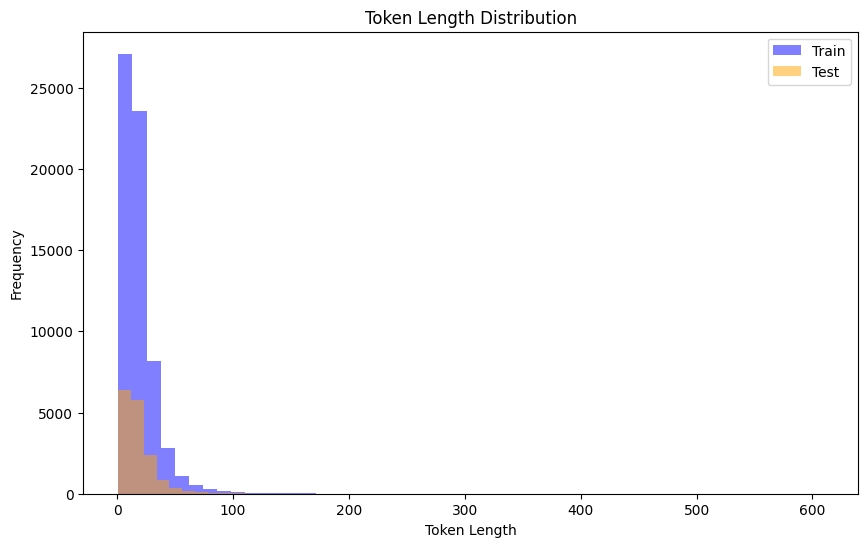

In [16]:
import matplotlib.pyplot as plt

# Calculate token lengths for train and test datasets
train_token_lengths = [len(t.split()) for t in X_train]
test_token_lengths = [len(t.split()) for t in X_test]

# Plot token length distribution
plt.figure(figsize=(10, 6))
plt.hist(train_token_lengths, bins=50, alpha=0.5, color='blue', label='Train')
plt.hist(test_token_lengths, bins=50, alpha=0.5, color='orange', label='Test')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Token Length Distribution')
plt.legend()
plt.show()

In [17]:
model = t.get_classifier()

/opt/conda/lib/python3.10/site-packages/ktrain/text/preprocessor.py:1093: UserWarning: Could not load a Tensorflow version of model. (If this worked before, it might be an out-of-memory issue.) Attempting to download/load PyTorch version as TensorFlow model using from_pt=True. You will need PyTorch installed for this.
  warnings.warn(


In [18]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=8)

In [19]:
# Adding early stopping callback from TensorFlow
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='accuracy', patience=5, mode='auto')

In [20]:
history = learner.fit_onecycle(2e-5, 8,callbacks=[early_stopping])



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/8
8010/8010 [==============================] - 4972s 607ms/step - loss: 1.1558 - accuracy: 0.5574 - val_loss: 0.9236 - val_accuracy: 0.6436
Epoch 2/8
8010/8010 [==============================] - 4851s 606ms/step - loss: 0.8463 - accuracy: 0.6757 - val_loss: 0.8218 - val_accuracy: 0.6798
Epoch 3/8
8010/8010 [==============================] - 4848s 605ms/step - loss: 0.6910 - accuracy: 0.7378 - val_loss: 0.8191 - val_accuracy: 0.6937
Epoch 4/8
8010/8010 [==============================] - 4847s 605ms/step - loss: 0.5534 - accuracy: 0.7947 - val_loss: 0.8747 - val_accuracy: 0.6944
Epoch 5/8
8010/8010 [==============================] - 4848s 605ms/step - loss: 0.4072 - accuracy: 0.8515 - val_loss: 0.8933 - val_accuracy: 0.7035
Epoch 6/8
8010/8010 [==============================] - 4846s 605ms/step - loss: 0.2386 - accuracy: 0.9170 - val_loss: 1.0800 - val_accuracy: 0.7051
Epoch 7/8
8010/8010 [============================

In [21]:
classes=t.get_classes()

In [22]:
cm = learner.validate(class_names=t.get_classes())

501/501 [==============================] - 354s 681ms/step
              precision    recall  f1-score   support

       anger       0.61      0.62      0.62      3036
     disgust       0.66      0.65      0.66      2620
        fear       0.80      0.73      0.76      1513
         joy       0.84      0.85      0.85      3567
     sadness       0.64      0.69      0.66      3262
    surprise       0.78      0.70      0.73      2021

    accuracy                           0.71     16019
   macro avg       0.72      0.71      0.71     16019
weighted avg       0.71      0.71      0.71     16019



In [23]:
# Making predictions on the test set
y_pred = learner.predict(val)

501/501 [==============================] - 341s 680ms/step


In [24]:
from sklearn.metrics import classification_report

In [25]:
# Getting the class names
class_names = t.get_classes()

# Generating the classification report with more decimal places
report = classification_report(y_test, y_pred.argmax(axis=1), target_names=class_names, digits=4)

print(report)

ValueError: Mix of label input types (string and number)

In [ ]:
# Save the trained model
learner.save_model('/kaggle/working/xlm_bengali.zip')